In [1]:
%config Completer.use_jedi = False

# Data preprocessing

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
house_df_org = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
house_df = house_df_org.copy()
house_df.head(n=3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
print("The shape of data: {}".format(house_df.shape))
print("\nThe type of features\n{}".format(house_df.dtypes.value_counts()))

isnull_series = house_df.isnull().sum()
print("\nNull columns and the counts: {}".format(isnull_series[isnull_series > 0].sort_values(ascending=False)))

The shape of data: (1460, 81)

The type of features
object     43
int64      35
float64     3
dtype: int64

Null columns and the counts: PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


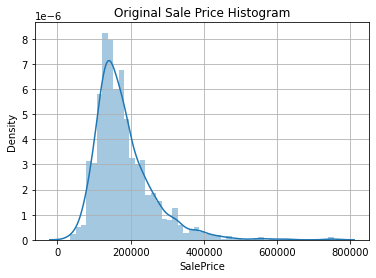

In [8]:
plt.title("Original Sale Price Histogram")
sns.distplot(house_df.SalePrice)
plt.grid()
plt.show()

In [9]:
from scipy import stats

In [10]:
k2, p = stats.normaltest(house_df.SalePrice)
alpha = 5e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 2.28385e-133
The null hypothesis can be rejected


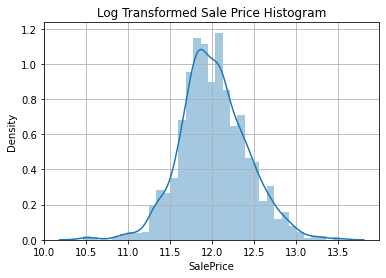

In [11]:
# Target log transformation
plt.title("Log Transformed Sale Price Histogram")
sns.distplot(np.log1p(house_df.SalePrice))
plt.grid()
plt.show()

In [12]:
k2, p = stats.normaltest(np.log1p(house_df.SalePrice))
alpha = 5e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 2.89192e-06
The null hypothesis can be rejected


In [13]:
# SalePrice log transformation
original_SalePrice = house_df.SalePrice
house_df.SalePrice = np.log1p(original_SalePrice)

In [14]:
# The columns which have too many null value or are unnecessary
drop_columns = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
house_df.drop(drop_columns, axis=1, inplace=True)

In [15]:
# Fill null values to a mean of the column
house_df.fillna(house_df.mean(), inplace=True)

In [16]:
# Extract columns and types with null values
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print("## Null feature and type##\n{}".format(house_df.dtypes[null_column_count.index]))

## Null feature and type##
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [17]:
print("A shape of dataset before one hot encoding: {}".format(house_df.shape))

house_df_ohe = pd.get_dummies(house_df)
print("A shape of dataset after one hot encoding: {}".format(house_df_ohe.shape))

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print("## Null features and types ##\n{}".format(house_df_ohe.dtypes[null_column_count]))

A shape of dataset before one hot encoding: (1460, 75)
A shape of dataset after one hot encoding: (1460, 271)
## Null features and types ##
Series([], dtype: object)


# Linear regression model

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
def get_rmse(model):
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print("{} Log transformed RMSE: {}".format(model.__class__.__name__, np.round(rmse, 3)))
    
    return rmse

In [20]:
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
        
    return rmses


In [21]:
y_target = house_df_ohe["SalePrice"]
x_features = house_df_ohe.drop("SalePrice", axis=1, inplace=False)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=156)

In [26]:
# Train, Predict, Evaluate
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

Lasso()

In [27]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression Log transformed RMSE: 0.132
Ridge Log transformed RMSE: 0.128
Lasso Log transformed RMSE: 0.176


[0.13189576579153936, 0.12750846334052998, 0.17628250556471406]

In [32]:
def get_top_bottom_coef(model, n=10):
    # Create a Series object based on coef_.
    # An index is column's name.
    coef = pd.Series(model.coef_, index=x_features.columns)
    
    # + top 10, - bottom 10
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    
    return coef_high, coef_low


In [49]:
def visualize_coefficient(models):
    
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for idx, model in enumerate(models):
        
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_df = pd.concat([coef_high, coef_low])
        
        axs[idx].set_title("{} Coefficients".format(model.__class__.__name__), size=25)
        axs[idx].tick_params(axis="y", direction="in", pad=-120)
        
        for label in (axs[idx].get_xticklabels() + axs[idx].get_yticklabels()):
            label.set_fontsize(22)
            
        sns.barplot(x=coef_df.values, y=coef_df.index, ax=axs[idx])

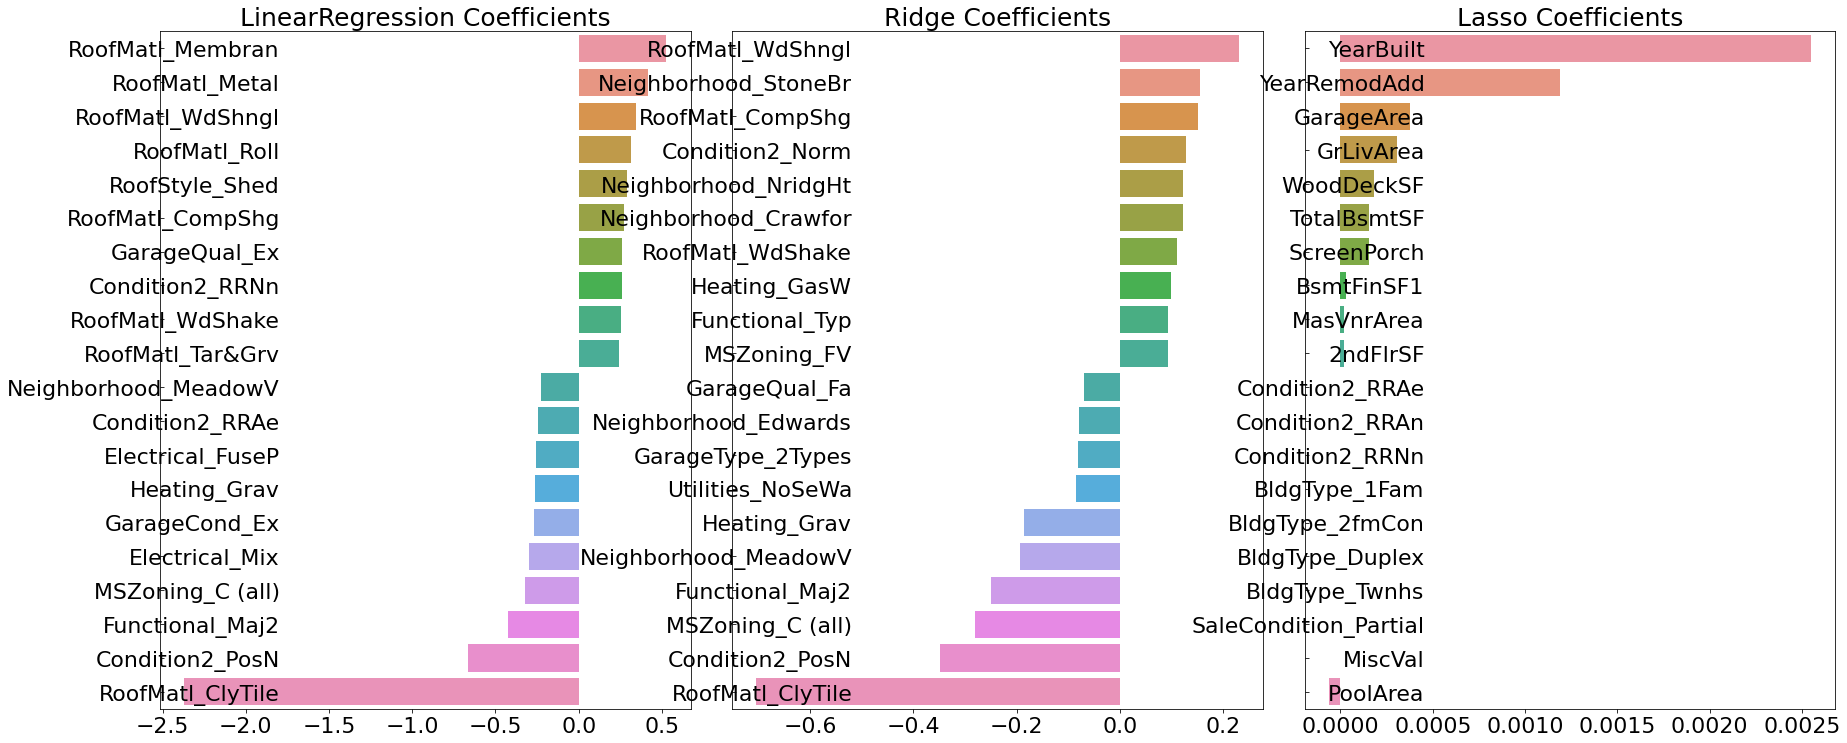

In [50]:
visualize_coefficient(models)

In [51]:
# cross validation
from sklearn.model_selection import cross_val_score

In [52]:
def get_avg_rmse_cv(models):
    
    for model in models:
        neg_rmse_list = cross_val_score(model, x_features, y_target, scoring="neg_mean_squared_error", cv=5)
        rmse_list = np.sqrt(-1 * neg_rmse_list)
        
        rmse_avg = np.mean(rmse_list)
        print("\n{} CV RMSE list: {}".format(model.__class__.__name__, np.round(rmse_list, 3)))
        print("{} CV RMSE AVG: {}".format(model.__class__.__name__, np.round(rmse_avg, 3)))

In [53]:
get_avg_rmse_cv(models)


LinearRegression CV RMSE list: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV RMSE AVG: 0.155

Ridge CV RMSE list: [0.117 0.154 0.142 0.117 0.189]
Ridge CV RMSE AVG: 0.144

Lasso CV RMSE list: [0.161 0.204 0.177 0.181 0.265]
Lasso CV RMSE AVG: 0.198


In [54]:
# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

In [55]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model,
                              param_grid=params,
                              scoring="neg_mean_squared_error",
                              cv=5)
    grid_model.fit(x_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print("{} 5 CV The best RMSE AVG: {}, alpha: {}".format(model.__class__.__name__,
                                                            np.round(rmse, 4),
                                                            grid_model.best_params_))

In [62]:
ridge_params = {'alpha': np.arange(0.05, 20, 0.05)}
lasso_params = {'alpha': np.arange(0.001, 10, 0.004)}

In [63]:
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV The best RMSE AVG: 0.1418, alpha: {'alpha': 11.000000000000002}
Lasso 5 CV The best RMSE AVG: 0.142, alpha: {'alpha': 0.001}


In [64]:
lr_reg_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg = Ridge(alpha=11)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [65]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression Log transformed RMSE: 0.132
Ridge Log transformed RMSE: 0.124
Lasso Log transformed RMSE: 0.12


[0.13189576579153936, 0.12396283786311425, 0.11995999974065165]

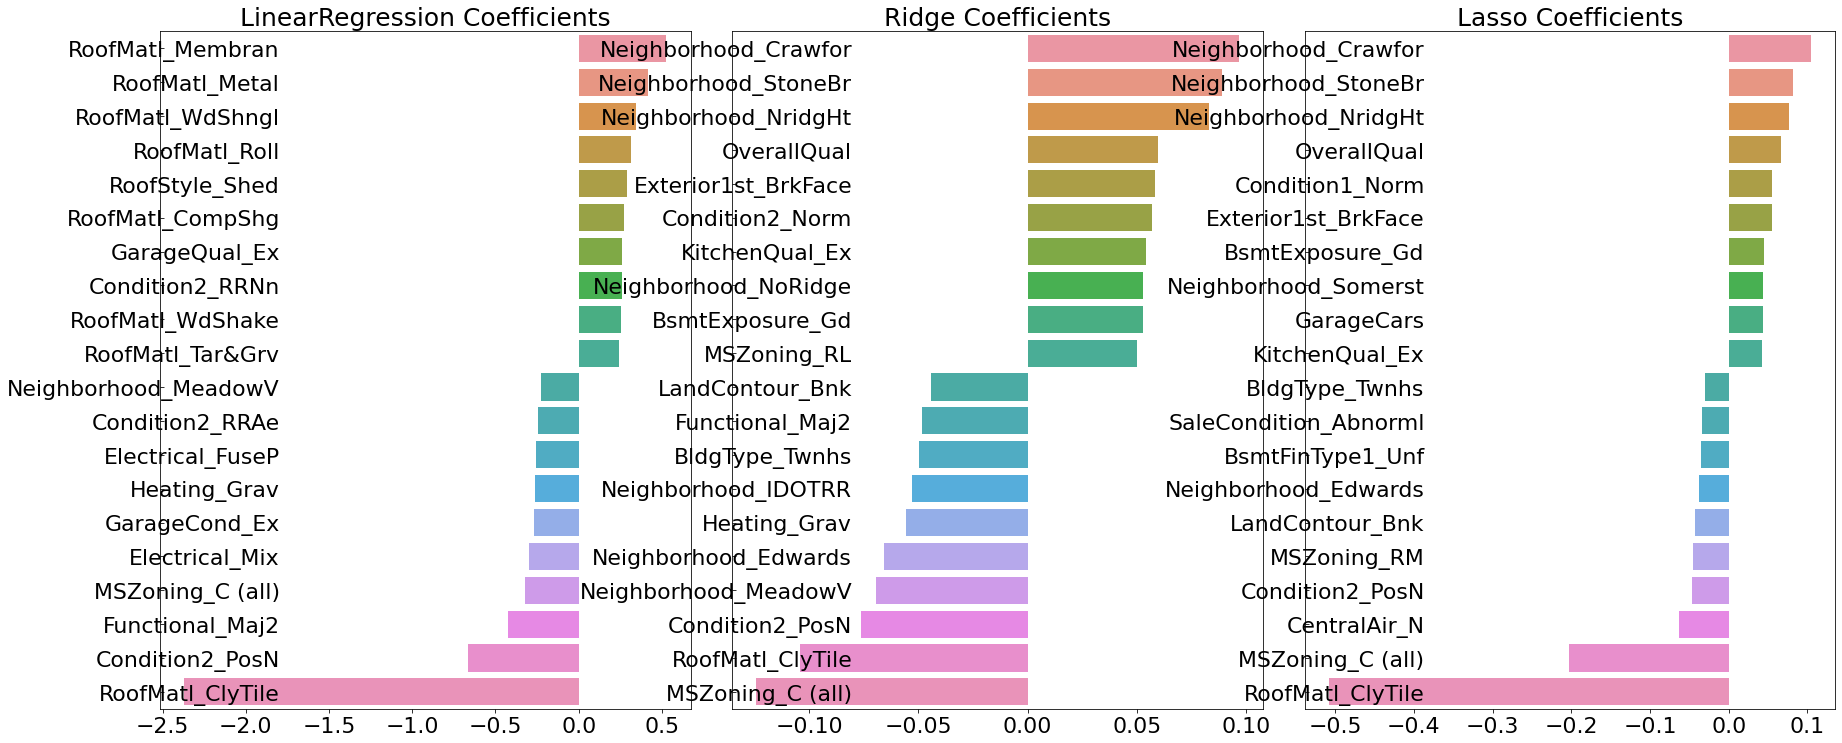

In [67]:
visualize_coefficient(models)